In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")

print(os.getcwd())

/Users/jh/dev/python/foundation


# Gradient

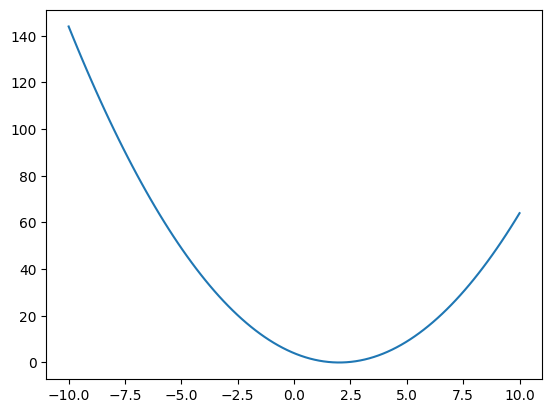

In [180]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xs = np.linspace(-10, 10, 100)

def f(x):
    return (x-2)**2

ys = f(x)

plt.plot(xs, ys)

In [189]:
def grad(x):
    return 2*(x-2)

print(grad(-5))
print(grad(2))
print(grad(5))

-14
0
6


# Derivatives and Graph

In [3]:
from src.main.core import Value, Graph
from src.main.visualisation import draw_dot

In [4]:
a = Value(data=2.0, label="a"); a.grad = 6.0
b = Value(data=-3.0, label="b"); b.grad = -4.0
c = Value(data=10.0, label="c"); c.grad = -2.0

d = a * b; d.label = "d"; d.grad = -2.0
e = d + c; e.label = "e"; e.grad = -2.0
f = Value(data=-2.0, label="f"); f.grad = 4.0
L = e * f; L.label = "L"
L.grad = 1.0

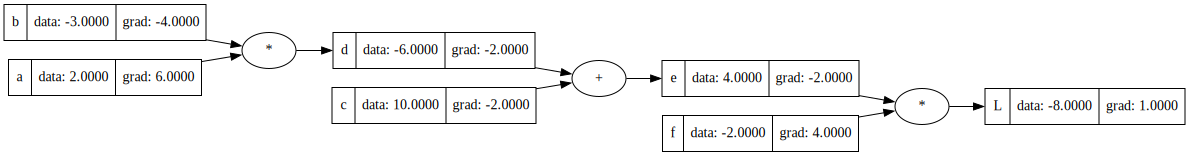

In [5]:
draw_dot(L)

## Derivatives by hand:

d(L)/dL = 1 * L^0 = 1.0

L = e * f = e^1 * f = e * f^1  

d(L)/de = 1 * e^0 * f = f = -2.0  
d(L)/df = e * 1 * f^0 = e = 4.0  

## Backpropagation > Chain rule

e = d + c

#### local derivates:  
d(e)/dd = 1.0  
d(e)/dc = 1.0  

#### chain rule:
d(L)/dd = d(L)/de * d(e)/dd = -2.0 * 1.0 = -2.0  
d(L)/dc = d(L)/de * d(e)/dc = -2.0 * 1.0 = -2.0  


d = a * b

#### local derivates:  
d(d)/da = b = -3.0  
d(d)/db = a = 2.0

#### chain rule:
d(L)/da = d(L)/de * d(e)/dd * d(d)/da = -2.0 * 1.0 * -3.0 = 6.0  
d(L)/db = d(L)/de * d(e)/dd * d(d)/db = -2.0 * 1.0 * 2.0 = -4.0  

## With other words

a.grad = b.data * d.grad  
b.grad = a.data * d.grad  
c.grad = e.grad  
d.grad = e.grad  
e.grad = L.grad * f.data  
f.grad = L.grad * e.data  
L.grad = 1.0  

from back to front:

=> (+) just distributes the gradient across nodes
=> (*) takes data of the other node and multiplies it with the gradient to get its gradient

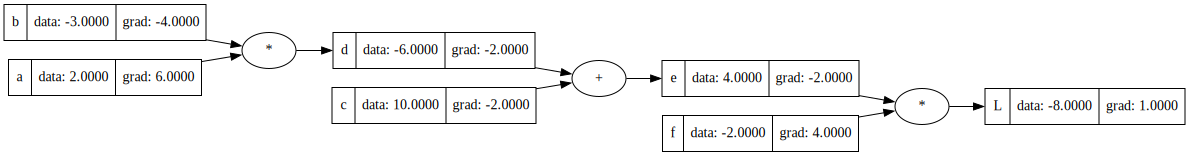

In [6]:
draw_dot(L)

In [7]:
# forward pass

step_size = 0.01

a.data += step_size * a.grad
b.data += step_size * b.grad
c.data += step_size * c.grad
f.data += step_size * f.grad

d = a * b
e = c + d
L = e * f

L.data

-7.286496

## Neuron

In [14]:
# input values
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias
bias = Value(6.8813735870195432, label="b")

# weighted inputs
x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"

# neuron
neuron = x1w1x2w2 + bias; neuron.label = "n"

#output
output = neuron.tanh(); output.label = "o"

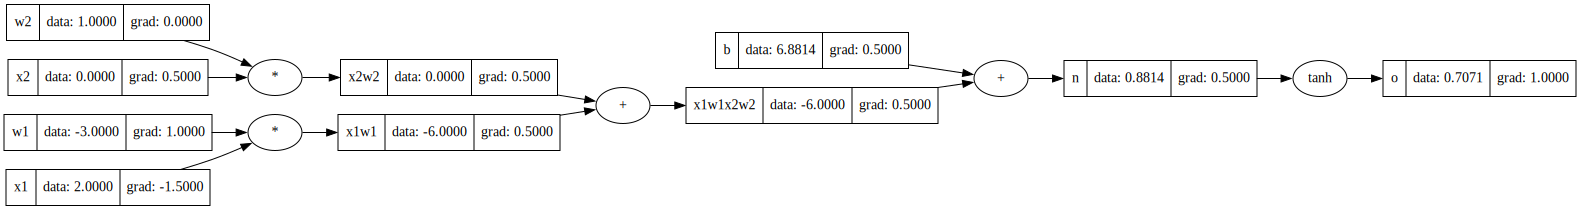

In [17]:
draw_dot(output)

### Automated backward propagation

In [16]:
output.backward()

### Semi automated backward progapagation

In [ ]:
output.grad = 1.0

In [ ]:
output._backward()

In [ ]:
neuron._backward()

In [ ]:
bias._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()

In [ ]:
x1w1._backward()

### Manuall backward propogation

In [13]:
import math

output.grad = 1.0

neuron.grad = 1 - math.tanh(neuron.data)**2 * output.grad # 0.5 => chain rule + derivative of tanh(x) according to wikipedia

bias.grad = neuron.grad # 0.5
x1w1x2w2.grad = neuron.grad # 0.5

x1w1.grad = x1w1x2w2.grad # 0.5
x2w2.grad = x1w1x2w2.grad # 0.5

x1.grad = w1.data * x1w1.grad # -1.5
w1.grad = x1.data * x1w1.grad # 1.0

x2.grad = w2.data * x2w2.grad # 0.5
w2.grad = x2.data * x2w2.grad # 0.0

## Derivatives

o = tanh(n)  
d(o)/dn = 1 - o^2 = 0.5 # wikipedia  


## Redesign tanh

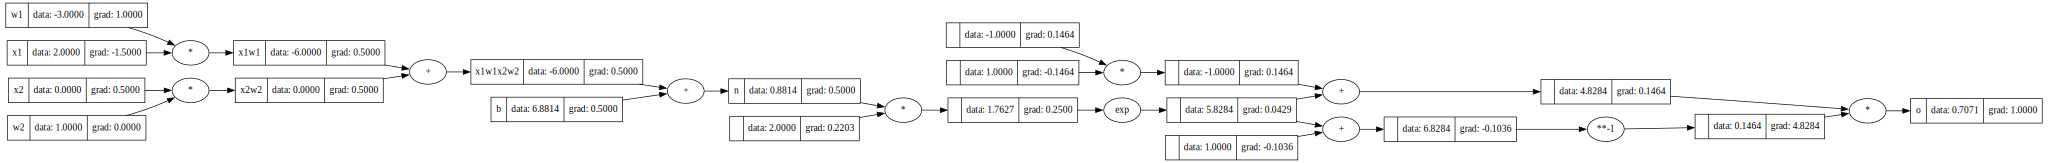

In [18]:
# input values
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias
bias = Value(6.8813735870195432, label="b")

# weighted inputs
x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"

# neuron
neuron = x1w1x2w2 + bias; neuron.label = "n"

#output
# output = neuron.tanh()
exp = (2 * neuron).exp()
output = (exp - 1)/(exp + 1)

output.label = "o"
output.backward()
draw_dot(output)

## PyTorch comparison

In [19]:
import torch

In [20]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

bias = torch.Tensor([6.8813735870195432]).double(); bias.requires_grad = True

x1w1 = x1 * w1
x2w2 = x2 * w2
x1w1x2w2 = x1w1 + x2w2

neuron = x1w1x2w2 + bias

output = torch.tanh(neuron)

print(f"output data: {output.data.item()}")
output.backward()

print("--- gradients ---")
print(f"w1 data: {w1.data.item()} | grad: {w1.grad.item()}")
print(f"x1 data: {x1.data.item()} | grad: {x1.grad.item()}")
print(f"w2 data: {w2.data.item()} | grad: {w2.grad.item()}")
print(f"x2 data: {x2.data.item()} | grad: {x2.grad.item()}")

output data: 0.7071066904050358
--- gradients ---
w1 data: -3.0 | grad: 1.0000002567688737
x1 data: 2.0 | grad: -1.5000003851533106
w2 data: 1.0 | grad: 0.0
x2 data: 0.0 | grad: 0.5000001283844369


# MLP - Multi layer perceptron

In [21]:
from src.main.nn import MLP

In [26]:
x = [2.0, 3.0, -1.0]
mlp = MLP(no_inputs=3, no_layer_outputs=[4, 4, 1])
out = mlp(x)
print(out)

[Value(data=-0.9782683714644843)]


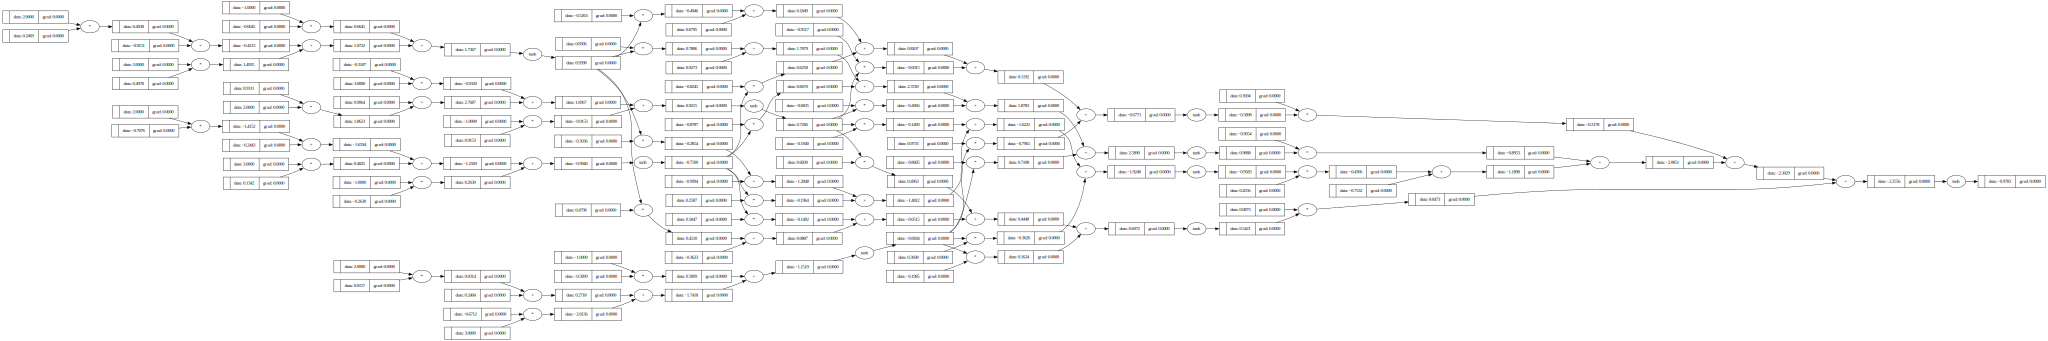

In [28]:
draw_dot(out[0])

# Training

## Simplest - single layer, single neuron perceptron

In [137]:
simple_model = MLP(no_inputs=1, no_layer_outputs=[1])

In [143]:
x = [2.0]
y = 1.0

prediction = simple_model(x)[0]
prediction

Value(data=0.8763658438810603)

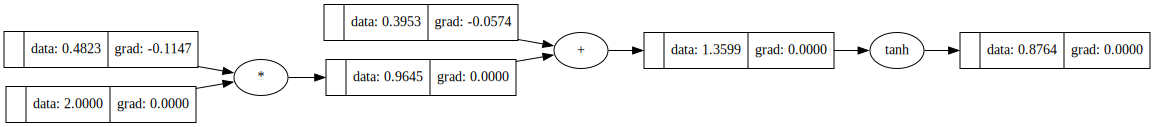

In [145]:
draw_dot(prediction)

In [146]:
# mse
loss = (prediction - y) ** 2
loss

Value(data=0.015285404559242351)

In [141]:
loss.backward()

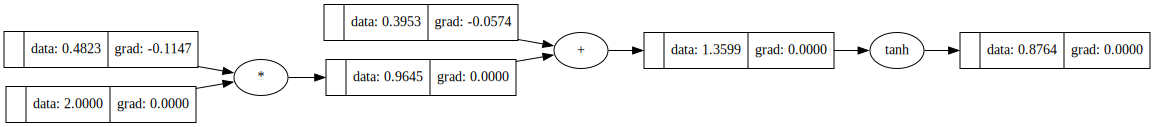

In [150]:
draw_dot(prediction)

weight (data=0.4823) was randomly initialiazed  
gradient (grad=-0.1147) was backpropagated through loss (mse)

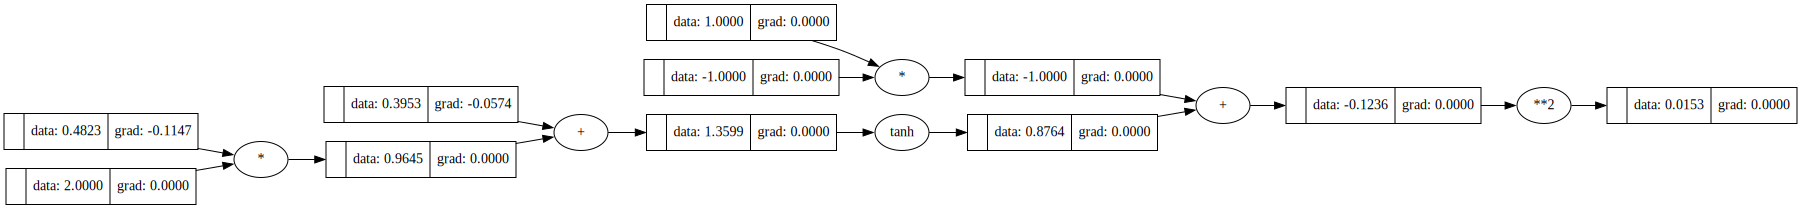

In [149]:
draw_dot(loss)

In [148]:
simple_model.layers[0].neurons[0].w[0].grad

-0.11472404409946474

gradient is negative => influence on loss is negative.  

increasing the weight of this neuron would make the loss go down.

## MLP

In [191]:
# input
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

# labels aka desired targets
ys = [1.0, -1.0, -1.0, 1.0]

model = MLP(no_inputs=3, no_layer_outputs=[4, 4, 1])

In [201]:
# forward pass
y_preds = [model(x) for x in xs]
y_preds

[[Value(data=0.2574118231690762)],
 [Value(data=-0.08239417203727908)],
 [Value(data=-0.18268049329529568)],
 [Value(data=0.2586491083319525)]]

In [210]:
# mse loss
losses = [(y_pred[0] - y)**2 for y_pred, y in zip(y_preds, ys)]
losses

[Value(data=0.37638395094043714),
 Value(data=0.018622976632388773),
 Value(data=0.09791558199103972),
 Value(data=0.33437598068470137)]

In [212]:
loss = sum(losses)
loss

Value(data=0.45091453930812986)

In [203]:
# backward pass
loss.backward()

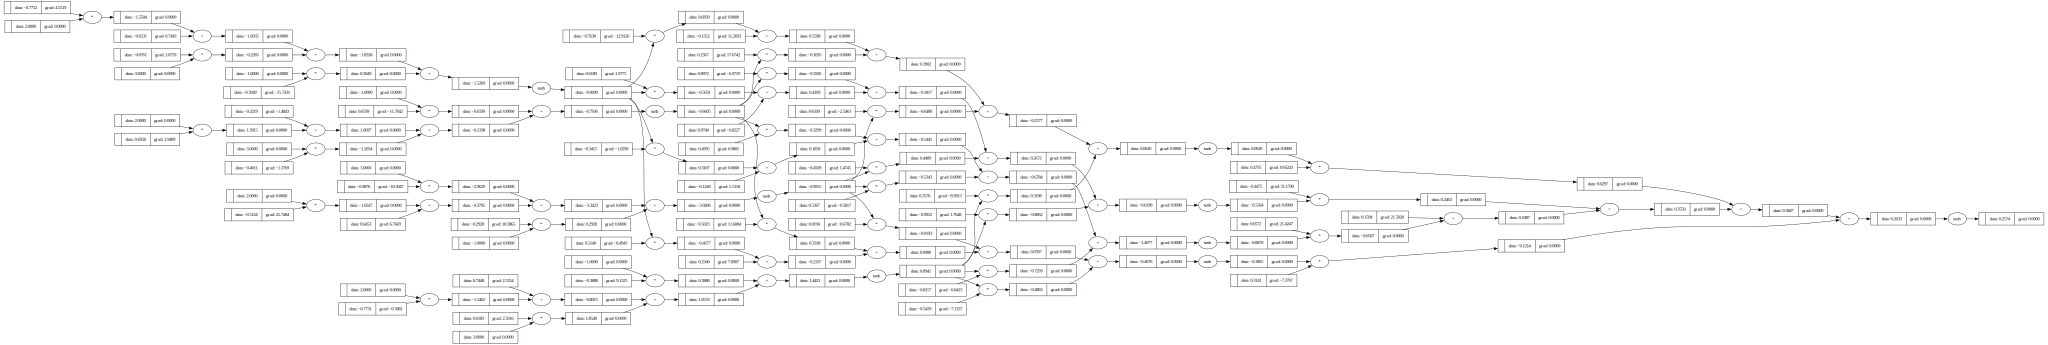

In [204]:
draw_dot(y_preds[0][0])

In [205]:
model.layers[0].neurons[0].w[0].grad

4.551930546572165

In [206]:
model.layers[0].neurons[0].w[0].data

-0.7751898183703608

In [207]:
# update
step_size = 0.01

for param in model.parameters():
    param.data += -1 * step_size * param.grad  # modify the gradient by a small step size in the direction of the gradient

the direction of the gradient points in the direction which increases the loss => we want to decreate the loss => go in the opposite direction of the gradient => multiply by -1

In [208]:
model.layers[0].neurons[0].w[0].data

-0.8207091238360825

### Full training loop

In [261]:
# input
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

# labels aka desired targets
ys = [1.0, -1.0, -1.0, 1.0]

model = MLP(no_inputs=3, no_layer_outputs=[4, 4, 1])
model.summary()

===== Model Summary =====
1. layer: <src.main.nn.Layer object at 0x1212515d0>: 16 params
2. layer: <src.main.nn.Layer object at 0x121253970>: 20 params
3. layer: <src.main.nn.Layer object at 0x121252980>: 5 params
Total parameters: 41


In [262]:
no_epochs = 100
step_size = 0.01


for i in range(no_epochs):

    # forward pass
    y_preds = [model(x) for x in xs]
    
    # mse loss
    losses = [(y_pred[0] - y)**2 for y_pred, y in zip(y_preds, ys)]
    loss = sum(losses)
    print(f"iteration {i} loss: {loss.data}")

    # backward pass
    loss.backward()
    
    # update of weights and biases
    for param in model.parameters():
        param.data += -1 * step_size * param.grad  # modify the gradient by a small step size in the direction of the gradient

iteration 0 loss: 3.8025100434382475
iteration 1 loss: 3.403418659090666
iteration 2 loss: 2.7327356118713513
iteration 3 loss: 2.016145580448425
iteration 4 loss: 1.5421718889832714
iteration 5 loss: 1.4521757721532935
iteration 6 loss: 1.5227072116501663
iteration 7 loss: 1.506315305957726
iteration 8 loss: 1.2767844437735572
iteration 9 loss: 0.8051496258183353
iteration 10 loss: 0.3122904539284815
iteration 11 loss: 0.09157574739934428
iteration 12 loss: 0.039994892706154535
iteration 13 loss: 0.029244174010474067
iteration 14 loss: 0.026551050314884694
iteration 15 loss: 0.02593345344158076
iteration 16 loss: 0.026222863558314883
iteration 17 loss: 0.027170224491671318
iteration 18 loss: 0.028724211128387363
iteration 19 loss: 0.03082925638752197
iteration 20 loss: 0.033282490229105705
iteration 21 loss: 0.03555573407831399
iteration 22 loss: 0.036633484188632146
iteration 23 loss: 0.03512036104297671
iteration 24 loss: 0.029992274695090523
iteration 25 loss: 0.021814071820281514


In [263]:
model.parameters()

[Value(data=0.7562367719141522),
 Value(data=3.5819008267736407),
 Value(data=1.6894195065163249),
 Value(data=2.8970772468344337),
 Value(data=3.0723751468131932),
 Value(data=1.6269267033581385),
 Value(data=-1.4612197439595151),
 Value(data=1.7645276873547826),
 Value(data=1.682028830025301),
 Value(data=2.821704848909116),
 Value(data=9.9947326577667),
 Value(data=3.175426262251142),
 Value(data=-0.4550882962051841),
 Value(data=2.553362750353984),
 Value(data=-1.1521366607766836),
 Value(data=-0.361444511358846),
 Value(data=3.430299263773966),
 Value(data=-2.32397257208617),
 Value(data=-4.383655579820451),
 Value(data=-0.8874499205056647),
 Value(data=-3.834261082673297),
 Value(data=-7.615111500595889),
 Value(data=4.0040573861553295),
 Value(data=9.751889957973725),
 Value(data=6.552853451591171),
 Value(data=-2.259796008826139),
 Value(data=-0.7344187831591995),
 Value(data=-0.043034195428452555),
 Value(data=3.1607368960670508),
 Value(data=2.8446160202734134),
 Value(data=0

In [265]:
# trained model predictions
[model(x) for x in xs]

[[Value(data=-1.0)],
 [Value(data=-0.9998240628822204)],
 [Value(data=-1.0)],
 [Value(data=0.999999990633461)]]